In [1]:
# Gerekli kutuphanelerin import edilmesi
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [2]:
# GPU ayarlanmasi
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-624d8629-5edf-2359-507a-600b369d0962)


In [3]:
# google drive, colab notebook'un dosyalar kısmına ekleniyor (mount ediliyor)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# On islemesi tamamlanan veri setinin okunmasi
with open("/content/drive/MyDrive/spectrograms_train_test_val/X_train.npy", "rb") as f:
  X_train = np.load(f)

with open("/content/drive/MyDrive/spectrograms_train_test_val/y_train.npy", "rb") as f:
  y_train = np.load(f)

with open("/content/drive/MyDrive/spectrograms_train_test_val/X_test.npy", "rb") as f:
  X_test = np.load(f)

with open("/content/drive/MyDrive/spectrograms_train_test_val/y_test.npy", "rb") as f:
  y_test = np.load(f)

with open("/content/drive/MyDrive/spectrograms_train_test_val/X_val.npy", "rb") as f:
  X_val = np.load(f)
  
with open("/content/drive/MyDrive/spectrograms_train_test_val/y_val.npy", "rb") as f:
  y_val = np.load(f)

In [5]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

Modelleme

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Modelin egitilmesi
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
164/164 [==============================] - 6s 17ms/step - loss: 1.5258 - accuracy: 0.4591 - val_loss: 1.1089 - val_accuracy: 0.6153
Epoch 2/20
164/164 [==============================] - 2s 14ms/step - loss: 0.9689 - accuracy: 0.6720 - val_loss: 0.8006 - val_accuracy: 0.7441
Epoch 3/20
164/164 [==============================] - 2s 14ms/step - loss: 0.7058 - accuracy: 0.7703 - val_loss: 0.5774 - val_accuracy: 0.8134
Epoch 4/20
164/164 [==============================] - 2s 14ms/step - loss: 0.5187 - accuracy: 0.8309 - val_loss: 0.5727 - val_accuracy: 0.8266
Epoch 5/20
164/164 [==============================] - 2s 14ms/step - loss: 0.4014 - accuracy: 0.8666 - val_loss: 0.4465 - val_accuracy: 0.8592
Epoch 6/20
164/164 [==============================] - 2s 14ms/step - loss: 0.2913 - accuracy: 0.9019 - val_loss: 0.4746 - val_accuracy: 0.8643
Epoch 7/20
164/164 [==============================] - 2s 14ms/step - loss: 0.2273 - accuracy: 0.9223 - val_loss: 0.5054 - val_accuracy: 0.8632

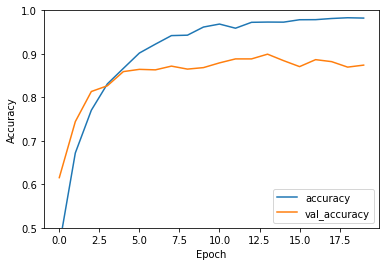

In [10]:
# Accuracy grafigi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

55/55 - 0s - loss: 0.5838 - accuracy: 0.8844 - 368ms/epoch - 7ms/step


Hiperparametre optimizasyonu ile modelin yeniden eğitilmesi

In [12]:
# Modelleme
model_hp = Sequential()
model_hp.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64, 64, 1)))
model_hp.add(Activation('relu'))
model_hp.add(Conv2D(32, (3, 3)))
model_hp.add(Activation('relu'))
model_hp.add(MaxPooling2D(pool_size=(2, 2)))
model_hp.add(Dropout(0.4))

model_hp.add(Conv2D(64, (3, 3), padding='same'))
model_hp.add(Activation('relu'))
model_hp.add(Conv2D(64, (3, 3)))
model_hp.add(Activation('relu'))
model_hp.add(MaxPooling2D(pool_size=(2, 2)))
model_hp.add(Dropout(0.4))

model_hp.add(Flatten())
model_hp.add(Dense(512))
model_hp.add(Activation('relu'))
model_hp.add(Dropout(0.7))
model_hp.add(Dense(num_classes))
model_hp.add(Activation('softmax'))

model_hp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# Modelin egitilmesi
history_hp = model_hp.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
164/164 [==============================] - 3s 16ms/step - loss: 1.7234 - accuracy: 0.3851 - val_loss: 1.1854 - val_accuracy: 0.6119
Epoch 2/20
164/164 [==============================] - 2s 14ms/step - loss: 1.1472 - accuracy: 0.6105 - val_loss: 0.8942 - val_accuracy: 0.7224
Epoch 3/20
164/164 [==============================] - 2s 14ms/step - loss: 0.9221 - accuracy: 0.7008 - val_loss: 0.7370 - val_accuracy: 0.7716
Epoch 4/20
164/164 [==============================] - 2s 14ms/step - loss: 0.7414 - accuracy: 0.7520 - val_loss: 0.6390 - val_accuracy: 0.7951
Epoch 5/20
164/164 [==============================] - 2s 14ms/step - loss: 0.6273 - accuracy: 0.8005 - val_loss: 0.5673 - val_accuracy: 0.8271
Epoch 6/20
164/164 [==============================] - 2s 14ms/step - loss: 0.5428 - accuracy: 0.8247 - val_loss: 0.4876 - val_accuracy: 0.8432
Epoch 7/20
164/164 [==============================] - 2s 14ms/step - loss: 0.4517 - accuracy: 0.8465 - val_loss: 0.4624 - val_accuracy: 0.8512

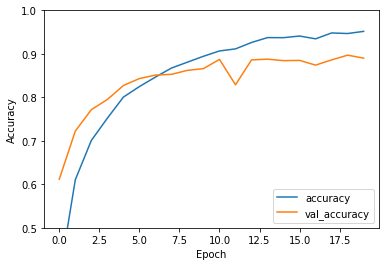

In [15]:
# Accuracy grafigi
plt.plot(history_hp.history['accuracy'], label='accuracy')
plt.plot(history_hp.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
test_loss, test_acc = model_hp.evaluate(X_test, y_test, verbose=2)

55/55 - 0s - loss: 0.5165 - accuracy: 0.8804 - 331ms/epoch - 6ms/step
